[[ 12.  57.  56.]
 [ 12.  57.  57.]
 [ 12.  57.  58.]
 ...
 [118.  67.  62.]
 [118.  67.  63.]
 [118.  67.  64.]]
(44186, 3)


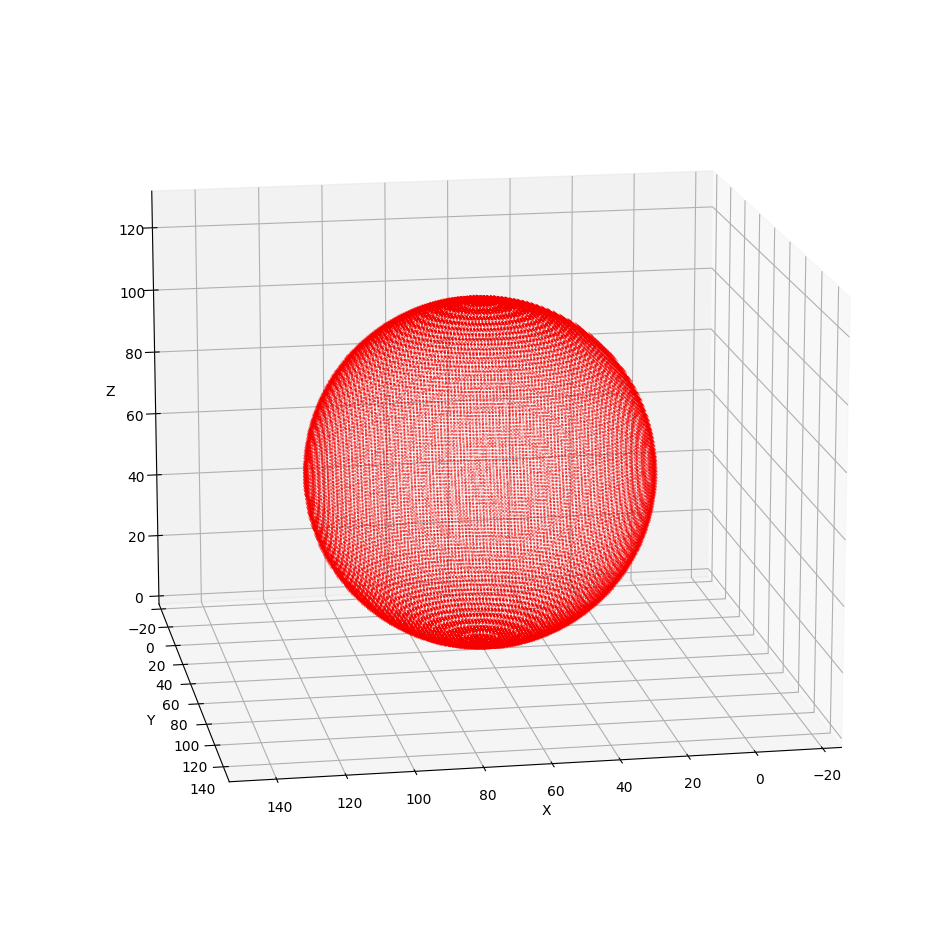

In [3]:
#取得した座標データを表示
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



b = np.loadtxt('C:/Users/kanta/desktop/choten/sphere128.txt', delimiter=',')
b = np.delete(b, 0, axis=1)

X1 = b[:,0]
Y1 = b[:,1]
Z1 = b[:,2]

X1 = np.round(X1)
Y1 = np.round(Y1)
Z1 = np.round(Z1)

virtex = np.vstack((X1, Y1))
virtex = np.vstack((virtex, Z1))
virtex = virtex.T
virtex = np.unique(virtex, axis=0)
print(virtex)
print(virtex.shape)

# Figureを追加
fig = plt.figure(figsize = (12, 12))

# 3DAxesを追加
ax = fig.add_subplot(projection='3d')

# Axesのタイトルを設定
ax.set_title("", size = 20)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(X1, Y1, Z1, s = 0.05, c = "red", alpha = 0.3)
ax.view_init(elev=15, azim=80)
ax.set_aspect('equal')
ax.axis("on")

plt.show()


#X,Y,Zを再び行列にして、重複要素を削除(unique)

In [20]:
#128の座標に色情報が入った配列

whole = np.zeros((128,128,128,3))
whole = whole.astype(np.int32)
dot = virtex.shape[0]
virtex = virtex.astype(np.int32)

#whole[127] = [200]

for i in range(dot):
    x = virtex[i,0]
    y = virtex[i,1]
    z = virtex[i,2]
    whole[x,y,z] = [0,200,200]  #BGR #0があるとおかしくなる，DCTしなくても


print(whole)
"""
#for i in range(dot):
for i in range(128):
    for j in range(128):
        for k in range(128):
            if np.all(virtex[0] == whole[i,j,k]):
    print("GG")"""

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

'\n#for i in range(dot):\nfor i in range(128):\n    for j in range(128):\n        for k in range(128):\n            if np.all(virtex[0] == whole[i,j,k]):\n    print("GG")'

In [5]:
#DCTIDCT

import numpy as np
import matplotlib.pyplot as plt

#コサイン定数の定義
C13 = -0.831469612
C9 = -0.195090322
C5 = 0.555570233


#近い分数を調べてそれでやればいい？
#いや，intにするときの丸め誤差の方が大きい気がする
#それでもやらないとだめ
#丸め誤差があっても逆Cでずれなければ大丈夫な可能性

#課題：ハードウェアでやる場合の誤差伝搬をどう少なくするか

C5_inv = 1 / C5
C9_inv = 1 / C9
C13_inv = 1 / C13

"""
print(C5_inv)
print(C9_inv)
print(C13_inv)
"""
#8*8*8を生成(8*8の同じ画像を8枚)
#ランダム
"""
x_in1 = np.random.rand(8,8,8)*255
x_in1 = x_in1.astype(np.int64)
"""
#自作

X_out1 = np.zeros((8,8,8))
X_out2 = np.zeros((8,8,8))
X_out3 = np.zeros((8,8,8))
x_in2 = np.zeros((8,8,8))
x_in3 = np.zeros((8,8,8))
x_in3i = np.zeros((8,8,8))
x_in2i = np.zeros((8,8,8))
x_in1i = np.zeros((8,8,8))
X_out1i = np.zeros((8,8,8))
X_out2i = np.zeros((8,8,8))


def butterfly_1(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[2] + x[3]
    X[2] = x[0] - x[1]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[6] + x[7]
    X[6] = x[4] - x[5]
    X[7] = x[6] - x[7]
    return X

def butterfly_2(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[4] + x[5]
    X[2] = x[2] + x[3]
    X[3] = x[6] + x[7]
    X[4] = x[0] - x[1]
    X[5] = x[4] - x[5]
    X[6] = x[2] - x[3]
    X[7] = x[6] - x[7]
    return X

def butterfly_3(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[0] - x[1]
    X[2] = x[2] + x[3]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[4] - x[5]
    X[6] = x[6] + x[7]
    X[7] = x[6] - x[7]
    return X

def cosine(x):
    X = np.zeros(8)
    X[0] = x[0]
    X[1] = x[1]*C13
    X[2] = x[2]*C9
    X[3] = x[3]*C9*C13
    X[4] = x[4]*C5
    X[5] = x[5]*C13*C5
    X[6] = x[6]*C9*C5
    X[7] = x[7]*C13*C9*C5
    return X

def Ibutterfly_1(X):
    x = np.zeros(8)
    x[0] = 0.5*(X[0] + X[2])
    x[1] = 0.5*(X[0] - X[2])
    x[2] = 0.5*(X[1] + X[3])
    x[3] = 0.5*(X[1] - X[3])
    x[4] = 0.5*(X[4] + X[6])
    x[5] = 0.5*(X[4] - X[6])
    x[6] = 0.5*(X[5] + X[7])
    x[7] = 0.5*(X[5] - X[7])
    return x

def Ibutterfly_2(X):
    x = np.zeros(8)
    x[0] = (X[0] + X[4]) / 2.0
    x[1] = (X[0] - X[4]) / 2.0
    x[2] = (X[2] + X[6]) / 2.0
    x[3] = (X[2] - X[6]) / 2.0
    x[4] = (X[1] + X[5]) / 2.0
    x[5] = (X[1] - X[5]) / 2.0
    x[6] = (X[3] + X[7]) / 2.0
    x[7] = (X[3] - X[7]) / 2.0
    return x

def Ibutterfly_3(X):
    x = np.zeros(8)
    x[0] = 0.5 * (X[0] + X[1])
    x[1] = 0.5 * (X[0] - X[1])
    x[2] = 0.5 * (X[2] + X[3])
    x[3] = 0.5 * (X[2] - X[3])
    x[4] = 0.5 * (X[4] + X[5])
    x[5] = 0.5 * (X[4] - X[5])
    x[6] = 0.5 * (X[6] + X[7])
    x[7] = 0.5 * (X[6] - X[7])
    return x

def inv_cosine(X):
    x = np.zeros(8)
    x[0] = X[0]
    x[1] = X[1] * C13_inv
    x[2] = X[2] * C9_inv
    x[3] = X[3] * (C9_inv * C13_inv)
    x[4] = X[4] * C5_inv
    x[5] = X[5] * (C5_inv * C13_inv)
    x[6] = X[6] * (C5_inv * C9_inv)
    x[7] = X[7] * (C5_inv * C9_inv * C13_inv)
    return x

def DCT1(x_in):
    X_1 = butterfly_1(x_in)
    X_2 = butterfly_2(X_1)
    X_3 = butterfly_3(X_2)
    X_out = cosine(X_3)
    return X_out

def IDCT1(X_out):
    X_3 = inv_cosine(X_out)
    X_2 = Ibutterfly_3(X_3)
    X_1 = Ibutterfly_2(X_2)
    x = Ibutterfly_1(X_1)
    return x

def DCT(x_in):
    for i in range(8):
        x = x_in[i]
        X_out = DCT1(x)
        x_in[i] = X_out
    return x_in
    
def IDCT(X_out):
    for i in range(8):
        X = X_out[i]
        x = IDCT1(X)
        X_out[i] = x
    return X_out

def tenchi(x):
    x = np.transpose(x)
    return x

def DCT_2D(x_in1, X_out1, x_in2, X_out2, x_in3, X_out3):
    # ｘ方向   
    X_out1 = DCT(x_in1)
    #転置
    x_in2 = tenchi(X_out1)
    #ｙ方向
    X_out2 = DCT(x_in2)
    #X_out3 = np.rot90(X_out3, -1, axes=(2,0)) #元に戻す回転（あえてやる必要はない）
    #X_out3 = X_out3.astype(np.int64)
    #print(X_out3)
    return X_out2

def IDCT_2D(X_out3, x_in3i, X_out2i, x_in2i, X_out1i, x_in1i):
    #y方向
    x_in2i = IDCT(X_out3)
    #転置
    X_out1i = tenchi(x_in2i)
    # ｘ方向   
    x_in1i = IDCT(X_out1i)
    x_in1i = x_in1i.astype(np.int64) #これがないと変になる
    #print(x_in1i)
    return x_in1i

In [38]:
#量子化テーブルの作成
import numpy as np

Ai = 255
A0 = 255
Bi = 0.001
B0 = 0.1
C = 10

#Ai<A0

tableY = np.zeros((8,8))
ryoshi_Y = np.array([[16,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])
tableY = ryoshi_Y
#tableY[tableY>255] = 255
print(tableY)



tableC = np.zeros((8,8))
ryoshi_C = np.array([[17,  18,  24,  47,  99,  99,  99 , 99 ],
[ 18,  21,  26,  66,  99,  99,  99,  99 ],
[ 24,  26,  56,  99,  99,  99,  99,  99 ],
[ 47,  66,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ]])
tableC = ryoshi_C
#tableC[tableC>255] = 255
print(tableC)

[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]
[[17 18 24 47 99 99 99 99]
 [18 21 26 66 99 99 99 99]
 [24 26 56 99 99 99 99 99]
 [47 66 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99]]


In [39]:
#i,j,kで指定して取り出して，DCTする
#割り算を掛け算にする
import numpy as np
import cv2
#スライスで取り出す
block = np.zeros((8,8,3))
#block = whole[0:8,0:8,0:8,:]
whole_DCT = np.zeros((128,128,128,3)).astype(np.uint8)
#print(block.shape)
#print(block[:,:,:,0])

X_out1 = np.zeros((8,8))
X_out2 = np.zeros((8,8))
X_out3 = np.zeros((8,8))
x_in2 = np.zeros((8,8))
x_in3 = np.zeros((8,8))
x_in3i = np.zeros((8,8))
x_in2i = np.zeros((8,8))
x_in1i = np.zeros((8,8))
X_out1i = np.zeros((8,8))
X_out2i = np.zeros((8,8))

notglow = 0
nonzeroY = np.array([])
saidaiY = np.array([])
nonzeroCr = np.array([])
saidaiCr = np.array([])
nonzeroCb = np.array([])
saidaiCb = np.array([])

for i in range(128):
     for j in range(16):
          for k in range(16):
                block = whole[i:(i+1),j*8:(j*8+8),k*8:(k*8+8),:].astype(np.uint8)
                #ここでDCTとIDCTをする
                #光ってないブロックはこれしなくていいからパス
                if np.all(block == 0):
                    whole_DCT[i:(i+1),j*8:(j*8+8),k*8:(k*8+8),:] = block
                    notglow =notglow + 1
                else:
                    block = block[0,:,:,:]
                    block = cv2.cvtColor(block,cv2.COLOR_BGR2YCrCb)
                        #lock[h] = cv2.cvtColor(block[h],cv2.COLOR_YCrCb2BGR) #YからGBRの変換がおかしい #hにしたらいけた
                        #print(block)

                
            
                    Y = block[:,:,0].astype(np.float32)
                    Cr = block[:,:,1].astype(np.float32)
                    Cb = block[:,:,2].astype(np.float32)
                    #print(Y)
                    #色を取り出して，YCrCbにする←関数でやる　日月のノルマ
                    #ここまでやると，３D像をDCT，IDCTして再び表示までが可能になる
                    #どのくらいの送信シンボル数でどのくらいの像が表示できるかを，大雑把にミーティングに持っていくことが目標
                    X_out3 = DCT_2D(Y, X_out1, x_in2, X_out2, x_in3, X_out3)
                    #量子化
                    X_out3 = X_out3/tableY
                    X_out3 = X_out3.astype(np.int64)
                    #print(X_out3)
                    saidaiY = np.append(saidaiY, np.amax(X_out3))
                    X_out3 = X_out3*tableY
                    #print(X_out3)

                    #0でない数字の個数と最大値を得る
                    nonzeroY = np.append(nonzeroY, (np.count_nonzero(X_out3)))
                    

                    #IDCT
                    Y_recrypt = IDCT_2D(X_out3, x_in3i, X_out2i, x_in2i, X_out1i, x_in1i)
    
                    #Cr
                    X_out3 = DCT_2D(Cr, X_out1, x_in2, X_out2, x_in3, X_out3)
                    #量子化
                    X_out3 = X_out3/tableC
                    X_out3 = X_out3.astype(np.int64)
                    saidaiCr = np.append(saidaiCr, np.amax(X_out3))
                    X_out3 = X_out3*tableC

                    nonzeroCr = np.append(nonzeroCr, (np.count_nonzero(X_out3)))
                    

                    Cr_recrypt = IDCT_2D(X_out3, x_in3i, X_out2i, x_in2i, X_out1i, x_in1i)

                    #Cb
                    X_out3 = DCT_2D(Cb, X_out1, x_in2, X_out2, x_in3, X_out3)
                    #量子化
                    X_out3 = X_out3/tableC 
                    X_out3 = X_out3.astype(np.int64)
                    #zigzag = np.copy(X_out3)
                    saidaiCb = np.append(saidaiCb, np.amax(X_out3))
                    X_out3 = X_out3*tableC

                    nonzeroCb = np.append(nonzeroCb, (np.count_nonzero(X_out3)))
                    

                    Cb_recrypt = IDCT_2D(X_out3, x_in3i, X_out2i, x_in2i, X_out1i, x_in1i)
                    #print(Y_recrypt)

                    #くっつけてBGRに戻す
                    Y_recrypt[Y_recrypt<0] = 0
                    Cr_recrypt[Cr_recrypt<0] = 0
                    Cb_recrypt[Cb_recrypt<0] = 0
                    Y_recrypt[Y_recrypt>255] = 255
                    Cr_recrypt[Cr_recrypt>255] = 255
                    Cb_recrypt[Cb_recrypt>255] = 255
                    Y_recrypt = Y_recrypt.astype(np.uint8)
                    Cr_recrypt = Cr_recrypt.astype(np.uint8)
                    Cb_recrypt = Cb_recrypt.astype(np.uint8)

                    #merge_YCrCb = np.zeros((8,8,3)).astype(np.uint8)
                    merge = np.zeros((8,8,3)).astype(np.uint8)

                    merge = cv2.merge((Y_recrypt, Cr_recrypt, Cb_recrypt))
                        #merge_YCrCb = merge_YCrCb.astype(np.uint8)
                        #print(merge)
                    merge = cv2.cvtColor(merge,cv2.COLOR_YCrCb2BGR) #ここがおかしい
                        #print(merge)  #会ってるかも？
                    #print(merge[0,0,0])
                    
                    whole_DCT[i:(i+1),j*8:(j*8+8),k*8:(k*8+8),:] = merge #ここがおかしい?ちゃんと代入されていない
                    #whole_DCT[0,0,0] = merge[0,0,0]
                    #print(whole_DCT[0,0,0])
                    #for 使わずに　やってみる
                    #もう一度DCTなしのやつをためす

#速度を早く
print(notglow/32768)
print("\n")
print(np.max(saidaiY))
print(np.max(saidaiCr))
print(np.max(saidaiCb))
print("\n")
print(np.sum(nonzeroY))
print(np.sum(nonzeroCr))
print(np.sum(nonzeroCb))





0.86181640625


619.0
534.0
476.0


92270.0
14791.0
46276.0


In [100]:
#量子化なしバージョン
#i,j,kで指定して取り出して，DCTする
#割り算を掛け算にする
import numpy as np
import cv2
#スライスで取り出す
block = np.zeros((8,8,8,3))
#block = whole[0:8,0:8,0:8,:]
whole_DCT = np.zeros((128,128,128,3)).astype(np.uint8)
#print(block.shape)
#print(block[:,:,:,0])

X_out1 = np.zeros((8,8,8))
X_out2 = np.zeros((8,8,8))
X_out3 = np.zeros((8,8,8))
x_in2 = np.zeros((8,8,8))
x_in3 = np.zeros((8,8,8))
x_in3i = np.zeros((8,8,8))
x_in2i = np.zeros((8,8,8))
x_in1i = np.zeros((8,8,8))
X_out1i = np.zeros((8,8,8))
X_out2i = np.zeros((8,8,8))

notglow = 0

for i in range(16):
     for j in range(16):
          for k in range(16):
                block = whole[i*8:(i*8+8),j*8:(j*8+8),k*8:(k*8+8),:].astype(np.uint8)
                #ここでDCTとIDCTをする
                #光ってないブロックはこれしなくていいからパス
                if np.all(block == 0):
                    #print(block)
                    whole_DCT[i*8:(i*8+8),j*8:(j*8+8),k*8:(k*8+8),:] = block
                    notglow =notglow + 1
                else:
                    for h in range(8):
                        block[h] = cv2.cvtColor(block[h],cv2.COLOR_BGR2YCrCb)
                        #lock[h] = cv2.cvtColor(block[h],cv2.COLOR_YCrCb2BGR) #YからGBRの変換がおかしい #hにしたらいけた
                        #print(block)

                
            
                    Y = block[:,:,:,0].astype(np.float32)
                    Cr = block[:,:,:,1].astype(np.float32)
                    Cb = block[:,:,:,2].astype(np.float32)
                    #print(Y)
                    #色を取り出して，YCrCbにする←関数でやる　日月のノルマ
                    #ここまでやると，３D像をDCT，IDCTして再び表示までが可能になる
                    #どのくらいの送信シンボル数でどのくらいの像が表示できるかを，大雑把にミーティングに持っていくことが目標
                    X_out3 = DCT_2D(Y, X_out1, x_in2, X_out2, x_in3, X_out3)
                    #量子化
                    #print(X_out3)
                    #X_out3 = X_out3/table
                    #X_out3 = X_out3.astype(np.int16)
                    #X_out3 = X_out3*table
                    #IDCT
                    Y_recrypt = IDCT_2D(X_out3, x_in3i, X_out2i, x_in2i, X_out1i, x_in1i)
    
                    #Cr
                    X_out3 = DCT_2D(Cr, X_out1, x_in2, X_out2, x_in3, X_out3)
                    #量子化
                    #X_out3 = X_out3/table
                    #X_out3 = X_out3.astype(np.int16)
                    #X_out3 = X_out3*table
                    Cr_recrypt = IDCT_2D(X_out3, x_in3i, X_out2i, x_in2i, X_out1i, x_in1i)

                    #Cb
                    X_out3 = DCT_2D(Cb, X_out1, x_in2, X_out2, x_in3, X_out3)
                    #量子化
                    #X_out3 = X_out3/table
                    #X_out3 = X_out3.astype(np.int16)
                    #zigzag = np.copy(X_out3)
                    #X_out3 = X_out3*table
                    Cb_recrypt = IDCT_2D(X_out3, x_in3i, X_out2i, x_in2i, X_out1i, x_in1i)
                    #print(Y_recrypt)

                    #くっつけてBGRに戻す
                    Y_recrypt[Y_recrypt<0] = 0
                    Cr_recrypt[Cr_recrypt<0] = 0
                    Cb_recrypt[Cb_recrypt<0] = 0
                    Y_recrypt[Y_recrypt>255] = 255
                    Cr_recrypt[Cr_recrypt>255] = 255
                    Cb_recrypt[Cb_recrypt>255] = 255
                    Y_recrypt = Y_recrypt.astype(np.uint8)
                    Cr_recrypt = Cr_recrypt.astype(np.uint8)
                    Cb_recrypt = Cb_recrypt.astype(np.uint8)

                    #merge_YCrCb = np.zeros((8,8,3)).astype(np.uint8)
                    merge = np.zeros((8,8,8,3)).astype(np.uint8)

                    for l in range(8):
                        merge[l] = cv2.merge((Y_recrypt[l], Cr_recrypt[l], Cb_recrypt[l]))
                        #merge_YCrCb = merge_YCrCb.astype(np.uint8)
                        #print(merge)
                        merge[l] = cv2.cvtColor(merge[l],cv2.COLOR_YCrCb2BGR) #ここがおかしい
                        #print(merge)  #会ってるかも？
                    #print(merge[0,0,0])
                    
                    whole_DCT[i*8:(i*8+8),j*8:(j*8+8),k*8:(k*8+8),:] = merge #ここがおかしい?ちゃんと代入されていない
                    #whole_DCT[0,0,0] = merge[0,0,0]
                    #print(whole_DCT[0,0,0])
                    #for 使わずに　やってみる
                    #もう一度DCTなしのやつをためす

#速度を早く
print(notglow)

#whole_DCTの，0に近い部分が0になってる




3302


(61353, 3)
(268961, 3)
[0.24705882 0.76470588 0.76470588 ... 0.78431373 0.54509804 0.38823529]
[[0.21568627 0.24705882 0.        ]
 [0.76470588 0.74901961 0.16470588]
 [0.76470588 0.74901961 0.16470588]
 ...
 [0.77254902 0.78431373 0.        ]
 [0.49411765 0.54509804 0.        ]
 [0.34901961 0.38823529 0.        ]]


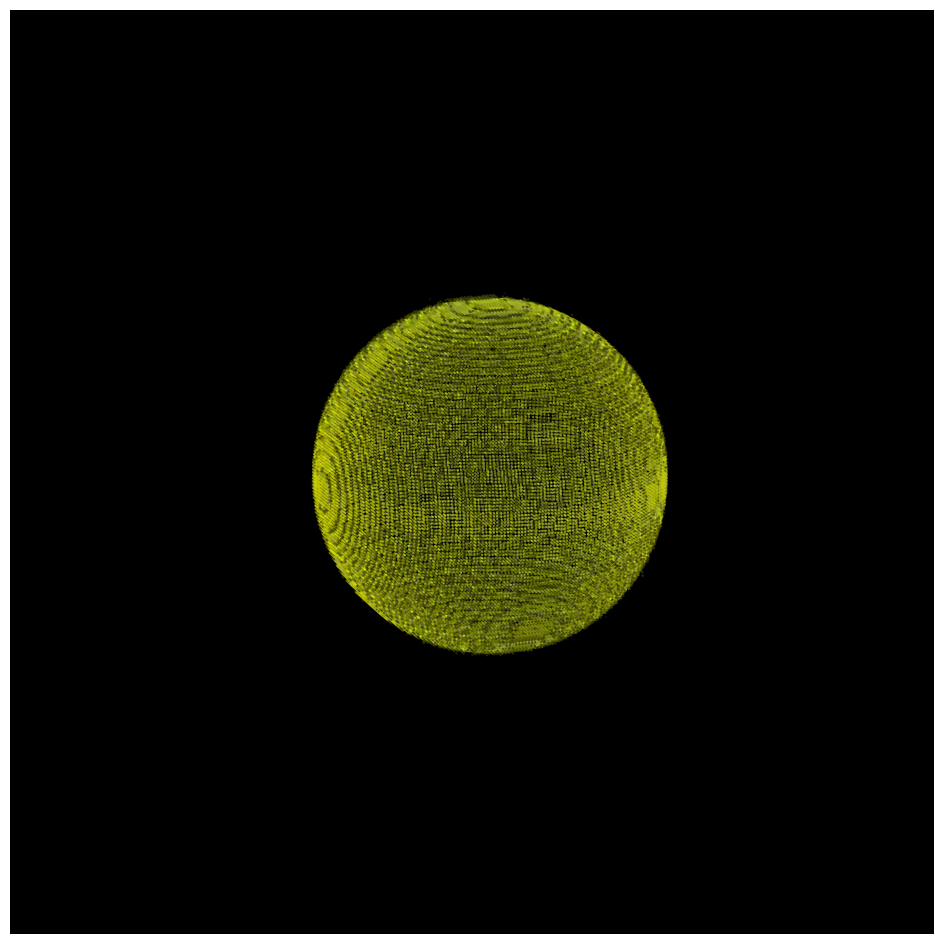

In [40]:
#128の座標に色情報が入った配列から表示できるようにする
#print(whole_DCT)
#色がある座標のみを取り出し，（座標，色）のデータにする．また，色をGBRからRGBに
nonzero_coords = np.argwhere(np.any(whole_DCT != [0,0,0], axis=-1))
color = np.zeros((nonzero_coords.shape[0], 3))


for i in range(color.shape[0]):
    color[i] = whole_DCT[nonzero_coords[i,0],nonzero_coords[i,1],nonzero_coords[i,2]]

mask = ~(color <= 50).all(axis=1)
filtered_color = color[mask]

filtered_color = filtered_color[..., ::-1] #BGRからRGBに変換
virtexx = nonzero_coords[mask]
print(virtexx.shape)
print(color.shape)

filtered_color[filtered_color>255] = 255

#正規化
filtered_color = (filtered_color/255) 

ALPHA = np.arange(virtexx.shape[0]).astype(np.float64)
for i in range(virtexx.shape[0]):
    ALPHA[i] = np.max(filtered_color[i])
ALPHA[ALPHA>1] = 1

print(ALPHA)
print(filtered_color)
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_facecolor('black')
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
ax.scatter(virtexx[:,0], virtexx[:,1], virtexx[:,2], s = 0.5, c = filtered_color, alpha = 0.6)
ax.view_init(elev=15, azim=250)
ax.set_aspect('equal')
ax.axis("off")

plt.show()
#光っている点の数をカウント

#頂点座標から3Dモデルにして確認

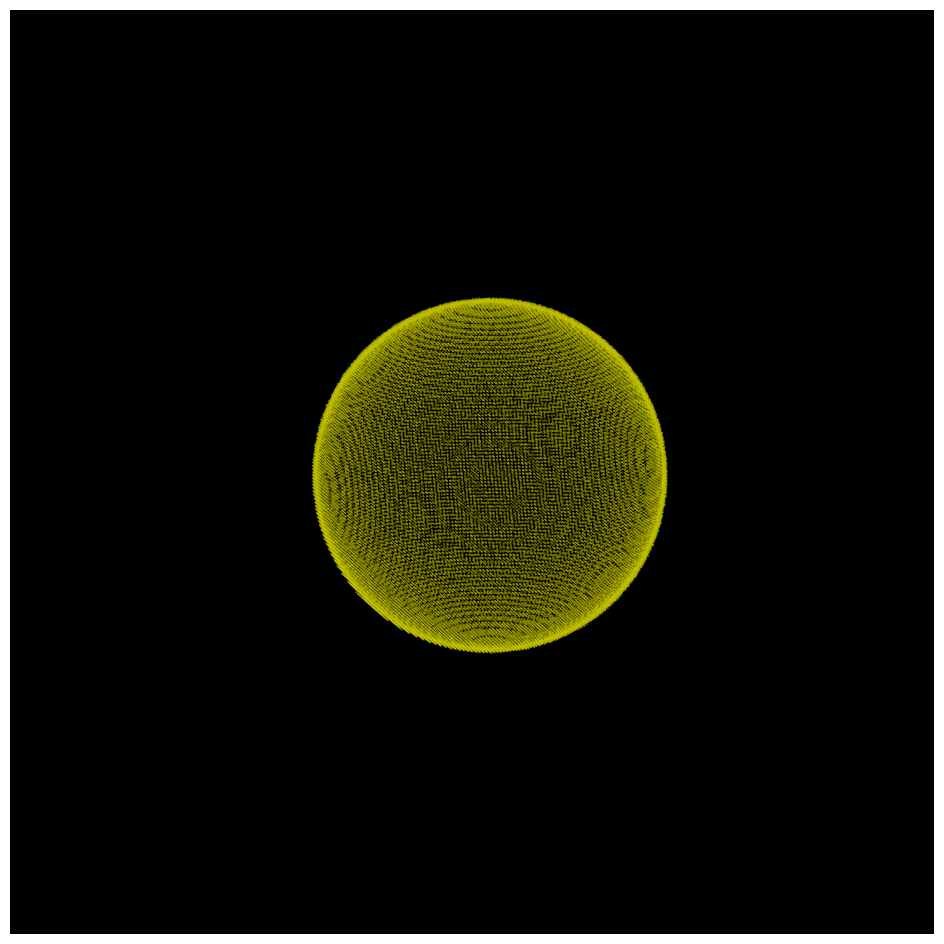

In [41]:
#なんもしないバージョン
#i,j,kで指定して取り出して，DCTする
#割り算を掛け算にする
import numpy as np
import cv2
#スライスで取り出す
block = np.zeros((8,8,8,3))
#block = whole[0:8,0:8,0:8,:]
whole_DCT_N = np.zeros((128,128,128,3)).astype(np.uint8)
#print(block.shape)
#print(block[:,:,:,0])

X_out1 = np.zeros((8,8,8))
X_out2 = np.zeros((8,8,8))
X_out3 = np.zeros((8,8,8))
x_in2 = np.zeros((8,8,8))
x_in3 = np.zeros((8,8,8))
x_in3i = np.zeros((8,8,8))
x_in2i = np.zeros((8,8,8))
x_in1i = np.zeros((8,8,8))
X_out1i = np.zeros((8,8,8))
X_out2i = np.zeros((8,8,8))

notglow = 0

for i in range(16):
     for j in range(16):
          for k in range(16):
                block = whole[i*8:(i*8+8),j*8:(j*8+8),k*8:(k*8+8),:].astype(np.uint8)
                whole_DCT_N[i*8:(i*8+8),j*8:(j*8+8),k*8:(k*8+8),:] = block #ここがおかしい?ちゃんと代入されていない
                    #whole_DCT[0,0,0] = merge[0,0,0]
                    #print(whole_DCT[0,0,0])
                    #for 使わずに　やってみる
                    #もう一度DCTなしのやつをためす

nonzero_coords = np.argwhere(np.any(whole_DCT_N != [0,0,0], axis=-1))
color = np.zeros((nonzero_coords.shape[0], 3))


for i in range(color.shape[0]):
    color[i] = whole_DCT_N[nonzero_coords[i,0],nonzero_coords[i,1],nonzero_coords[i,2]]

mask = ~(color <= 20).all(axis=1)
filtered_color = color[mask]

filtered_color = filtered_color[..., ::-1] #BGRからRGBに変換
virtex = nonzero_coords[mask]
#print(virtex.shape)
#print(color.shape)

filtered_color[filtered_color>255] = 255

#正規化
filtered_color = (filtered_color/255) 

ALPHA = np.arange(virtex.shape[0]).astype(np.float64)
for i in range(virtex.shape[0]):
    ALPHA[i] = np.max(filtered_color[i])
ALPHA[ALPHA>1] = 1

#print(ALPHA)
#print(filtered_color)
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_facecolor('black')
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
ax.scatter(virtex[:,0], virtex[:,1], virtex[:,2], s = 0.05, c = filtered_color, alpha = 1)
ax.view_init(elev=15, azim=250)
ax.set_aspect('equal')
ax.axis("off")

plt.show()
#光っている点の数をカウント

#頂点座標から3Dモデルにして確認

